In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
!pip install seaborn

In [51]:
import seaborn as sns

# Load data and preliminary plots

In [127]:
import sys
sys.path.insert(0, '.')
sys.path.insert(0, '../../01_exploratory_data_analysis/rainfall')

from missing_value_handler import fill_na

In [52]:
data = pd.read_csv('../../02_dataset/merged_df.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(15)

ISO3_code  Year       country  yearly_avg_rainfall  rainfall_var_t  \
2550       EGY  1994         Egypt            32.556774        0.394577   
4167       JAM  1976       Jamaica          1183.777778       -0.139436   
8047       SYR  2016         Syria           251.524573        0.033191   
6626       POL  1986        Poland           478.621951       -0.083903   
1226       BFA  2018  Burkina Faso           727.489583        0.115114   
287        ARG  1990     Argentina           544.222626        0.281634   
3034       GAB  1995         Gabon          1533.946360       -0.049665   
5434       MDA  2000       Moldova           371.522222       -0.098903   
3306       GRC  1980        Greece           605.887931       -0.026131   
729        BEL  1969       Belgium           671.755556       -0.015278   
4974       LTU  1999     Lithuania           524.135135       -0.184168   
3422       GIN  1968        Guinea          1390.362140       -0.117467   
8933       URY  2005       Uruguay          1176.788557        0.274244   
3730       HND  2017      Honduras          1657.659722        0.071978   
575        AZE  2020    Azerbaijan           386.222917        0.256418   

      rainfall_var_t_1  yearly_avg_temp  temp_var_t  temp_var_t_1  \
2550         -0.221078       225.299708    0.009089      0.034809   
4167         -0.270022       241.500000    0.004622      0.004410   
8047          0.110979       191.736111    0.005350     -0.011988   
6626          0.169738        74.431911    0.106786     -0.134482   
1226         -0.112798       298.157197    0.001081     -0.005049   
287           0.052266       151.148291   -0.024641      0.051497   
3034          0.087350       249.676245    0.010902     -0.000527   
5434         -0.100251       110.355556    0.000000      0.096974   
3306          0.036529       129.445402   -0.054637      0.045357   
729           0.021105        93.088889    0.000717     -0.071635   
4974          0.103810        75.518018    0.165207     -0.003152   
3422         -0.061196       254.000000    0.014701     -0.015939   
8933         -0.291358       182.250000    0.006422      0.014861   
3730          0.063836       250.013889   -0.008428      0.001867   
575          -0.216416       132.547917   -0.025980     -0.023938   

      pt_gdp_agriculture  ...  gdp_pchange  gdp_percap  gdp_percap_pchange  \
2550           15.714286  ...     3.973170   8221.0470            1.757536   
4167            9.023869  ...    -6.694230   8742.1650            0.000000   
8047           34.166874  ...    -6.405592   5022.1130           -5.280217   
6626            5.735880  ...     0.000000  12086.6230            0.000000   
1226           20.997473  ...     6.604578   2316.3943            3.767727   
287             8.123676  ...    -2.467211  17007.2850            0.000000   
3034            8.031674  ...     4.973852  24344.1860            2.310939   
5434           25.409320  ...     2.107722   5727.0790            2.315578   
3306            6.869984  ...     0.677133  26841.9100            0.000000   
729             1.340821  ...     6.629803  42487.6880            0.000000   
4974            6.353636  ...    -1.097001  15333.7000           -0.392798   
3422           29.091300  ...     0.000000   2075.9920            0.000000   
8933            8.745837  ...     7.460137  18872.4360            7.374345   
3730           12.669768  ...     4.842918   6099.6074            2.921078   
575             6.738947  ...    -4.299997  19126.0960           -4.952697   

      unemp_rate  unemp_rate_pchange      gini  gini_pchange  population  \
2550      10.930            0.091575  0.309606      0.000000         NaN   
4167       4.083            0.000000  0.415598      0.000000         NaN   
8047      13.867           -2.960112  0.359708      0.000000         NaN   
6626       2.886            0.000000  0.279845     11.563484         NaN   
1226       4.695            0.751073  0.430167      1.514510  20438288

In [130]:
for code in data['ISO3_code'].unique():
    data = fill_na(data, 'gdp_pchange', 'ISO3_code', code, method='value', value=0.)

TypeError: 'NoneType' object is not subscriptable

In [53]:
data.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [54]:
feats = ['Year', 'yearly_avg_rainfall', 'rainfall_var_t', 'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'pt_gdp_agriculture', 'oil_rent', 'democracy_polity', 'gdp', 'gini', 'protest_fraction']

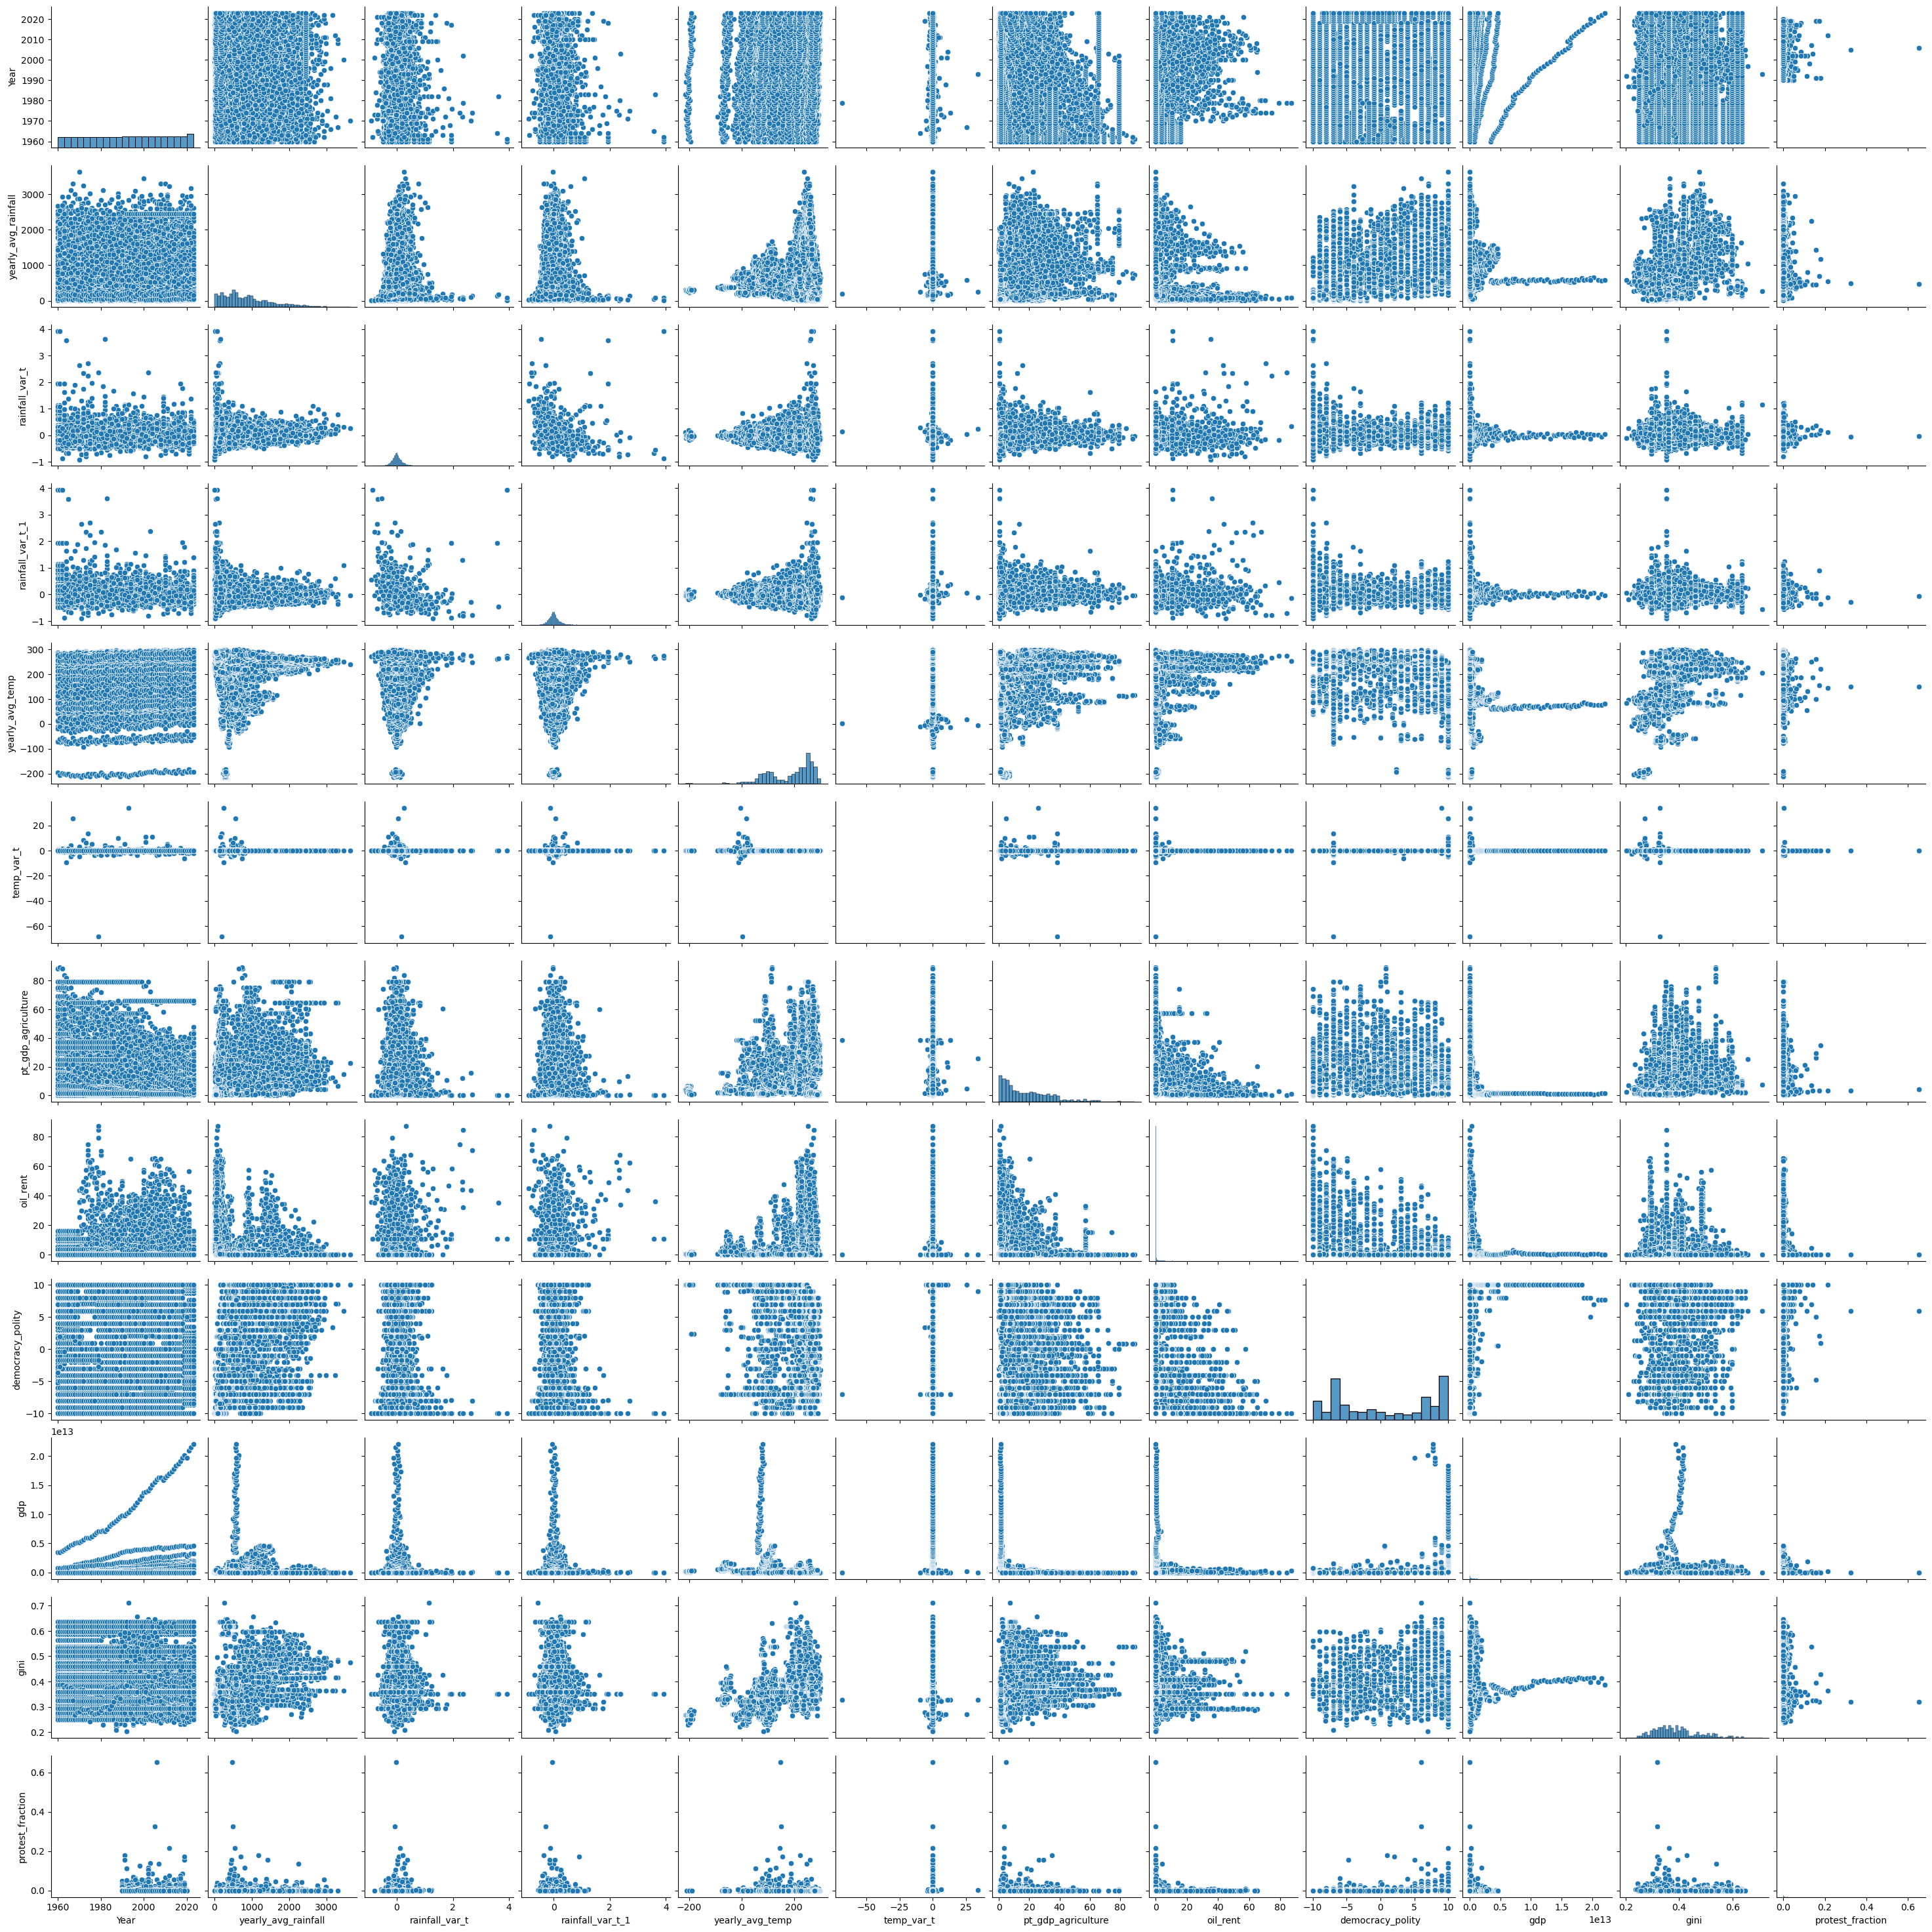

In [55]:
sns.pairplot(data[feats])

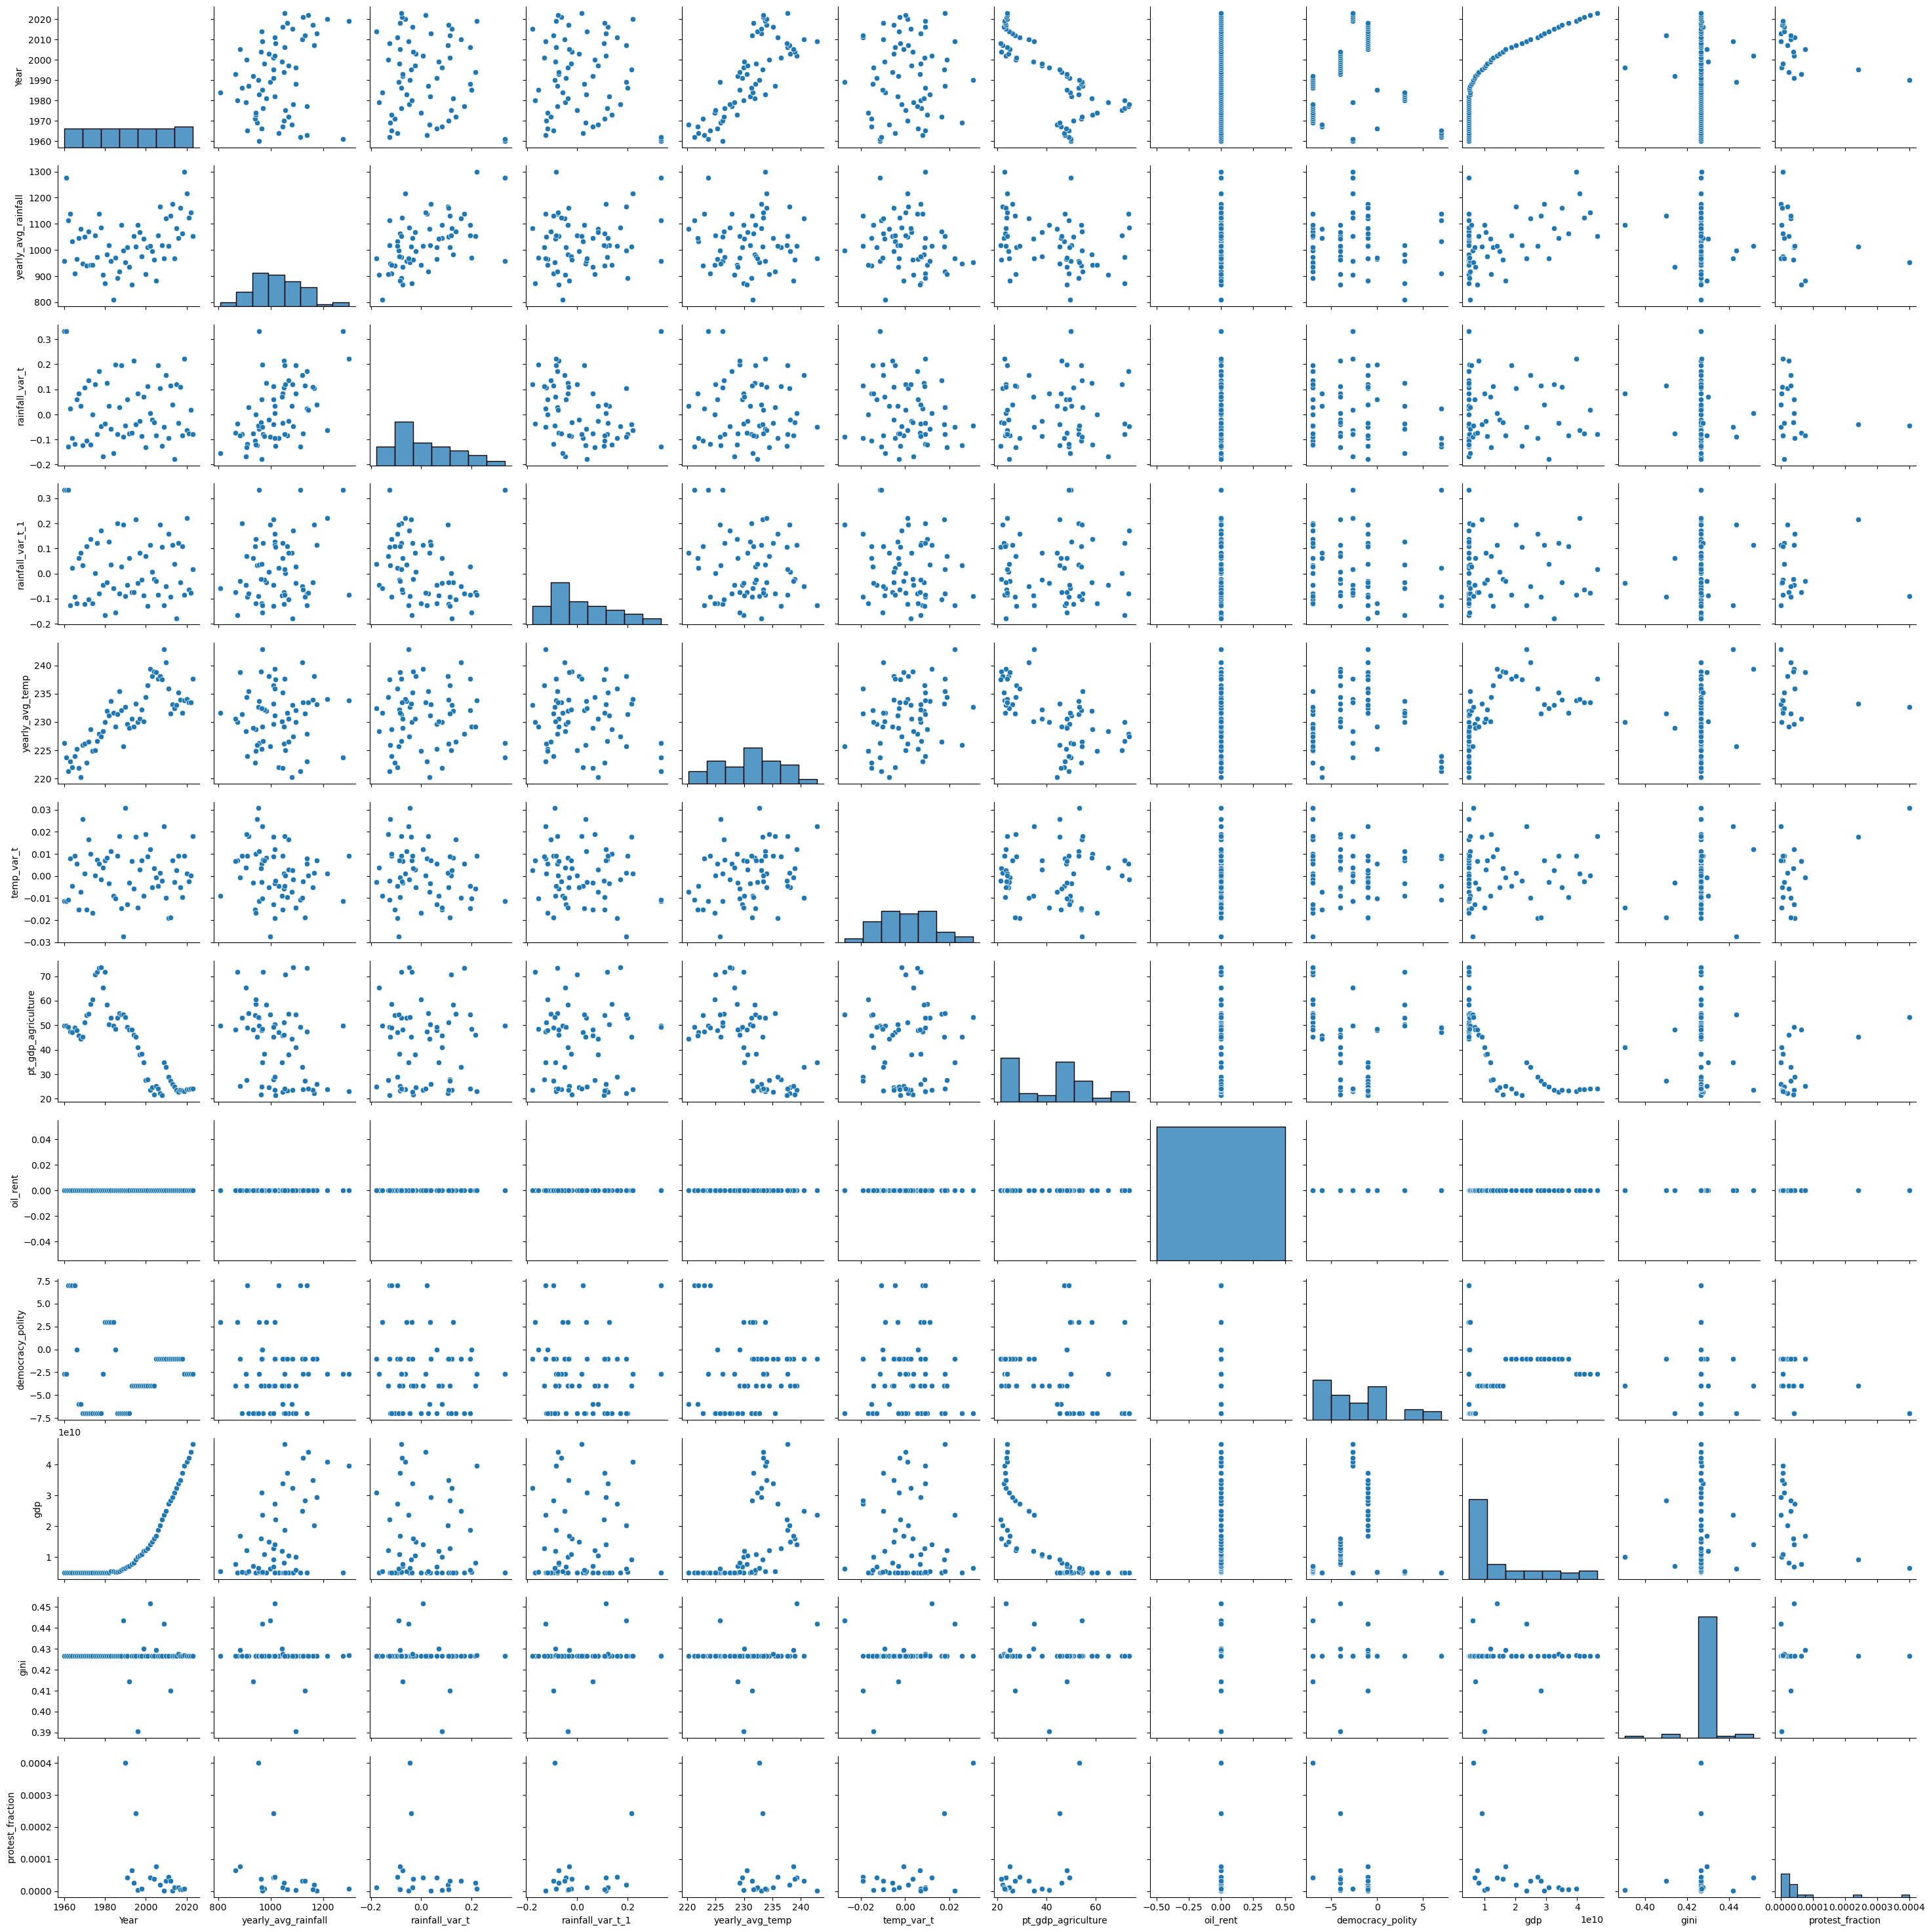

In [56]:
country = data[data['ISO3_code']=='UGA']
sns.pairplot(country[feats])

In [57]:
subsaharan = ['AGO', 'BEN', 'BWA', 'CIV', 'CAF', 'CMR', 'COD', 'COG', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'KEN', 'LSO', 'LBR', 'MDG', 'MLI', 'MRT', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SDN', 'SLE', 'SOM', 'SSD', 'SWZ', 'SYC', 'TCD', 'TGO', 'TZA', 'UGA', 'ZMB', 'ZWE']
sub_data = data[data['ISO3_code'].isin(subsaharan)]
print(sub_data['ISO3_code'].unique())
print(len(sub_data['ISO3_code'].unique()))

['AGO' 'BEN' 'BWA' 'CAF' 'TCD' 'COG' 'CIV' 'COD' 'DJI' 'ERI' 'ETH' 'GAB'
 'GMB' 'GHA' 'GIN' 'KEN' 'LSO' 'LBR' 'MDG' 'MWI' 'MLI' 'MRT' 'NAM' 'NER'
 'NGA' 'RWA' 'SEN' 'SLE' 'SOM' 'SDN' 'TZA' 'TGO' 'UGA' 'ZMB' 'ZWE']
35


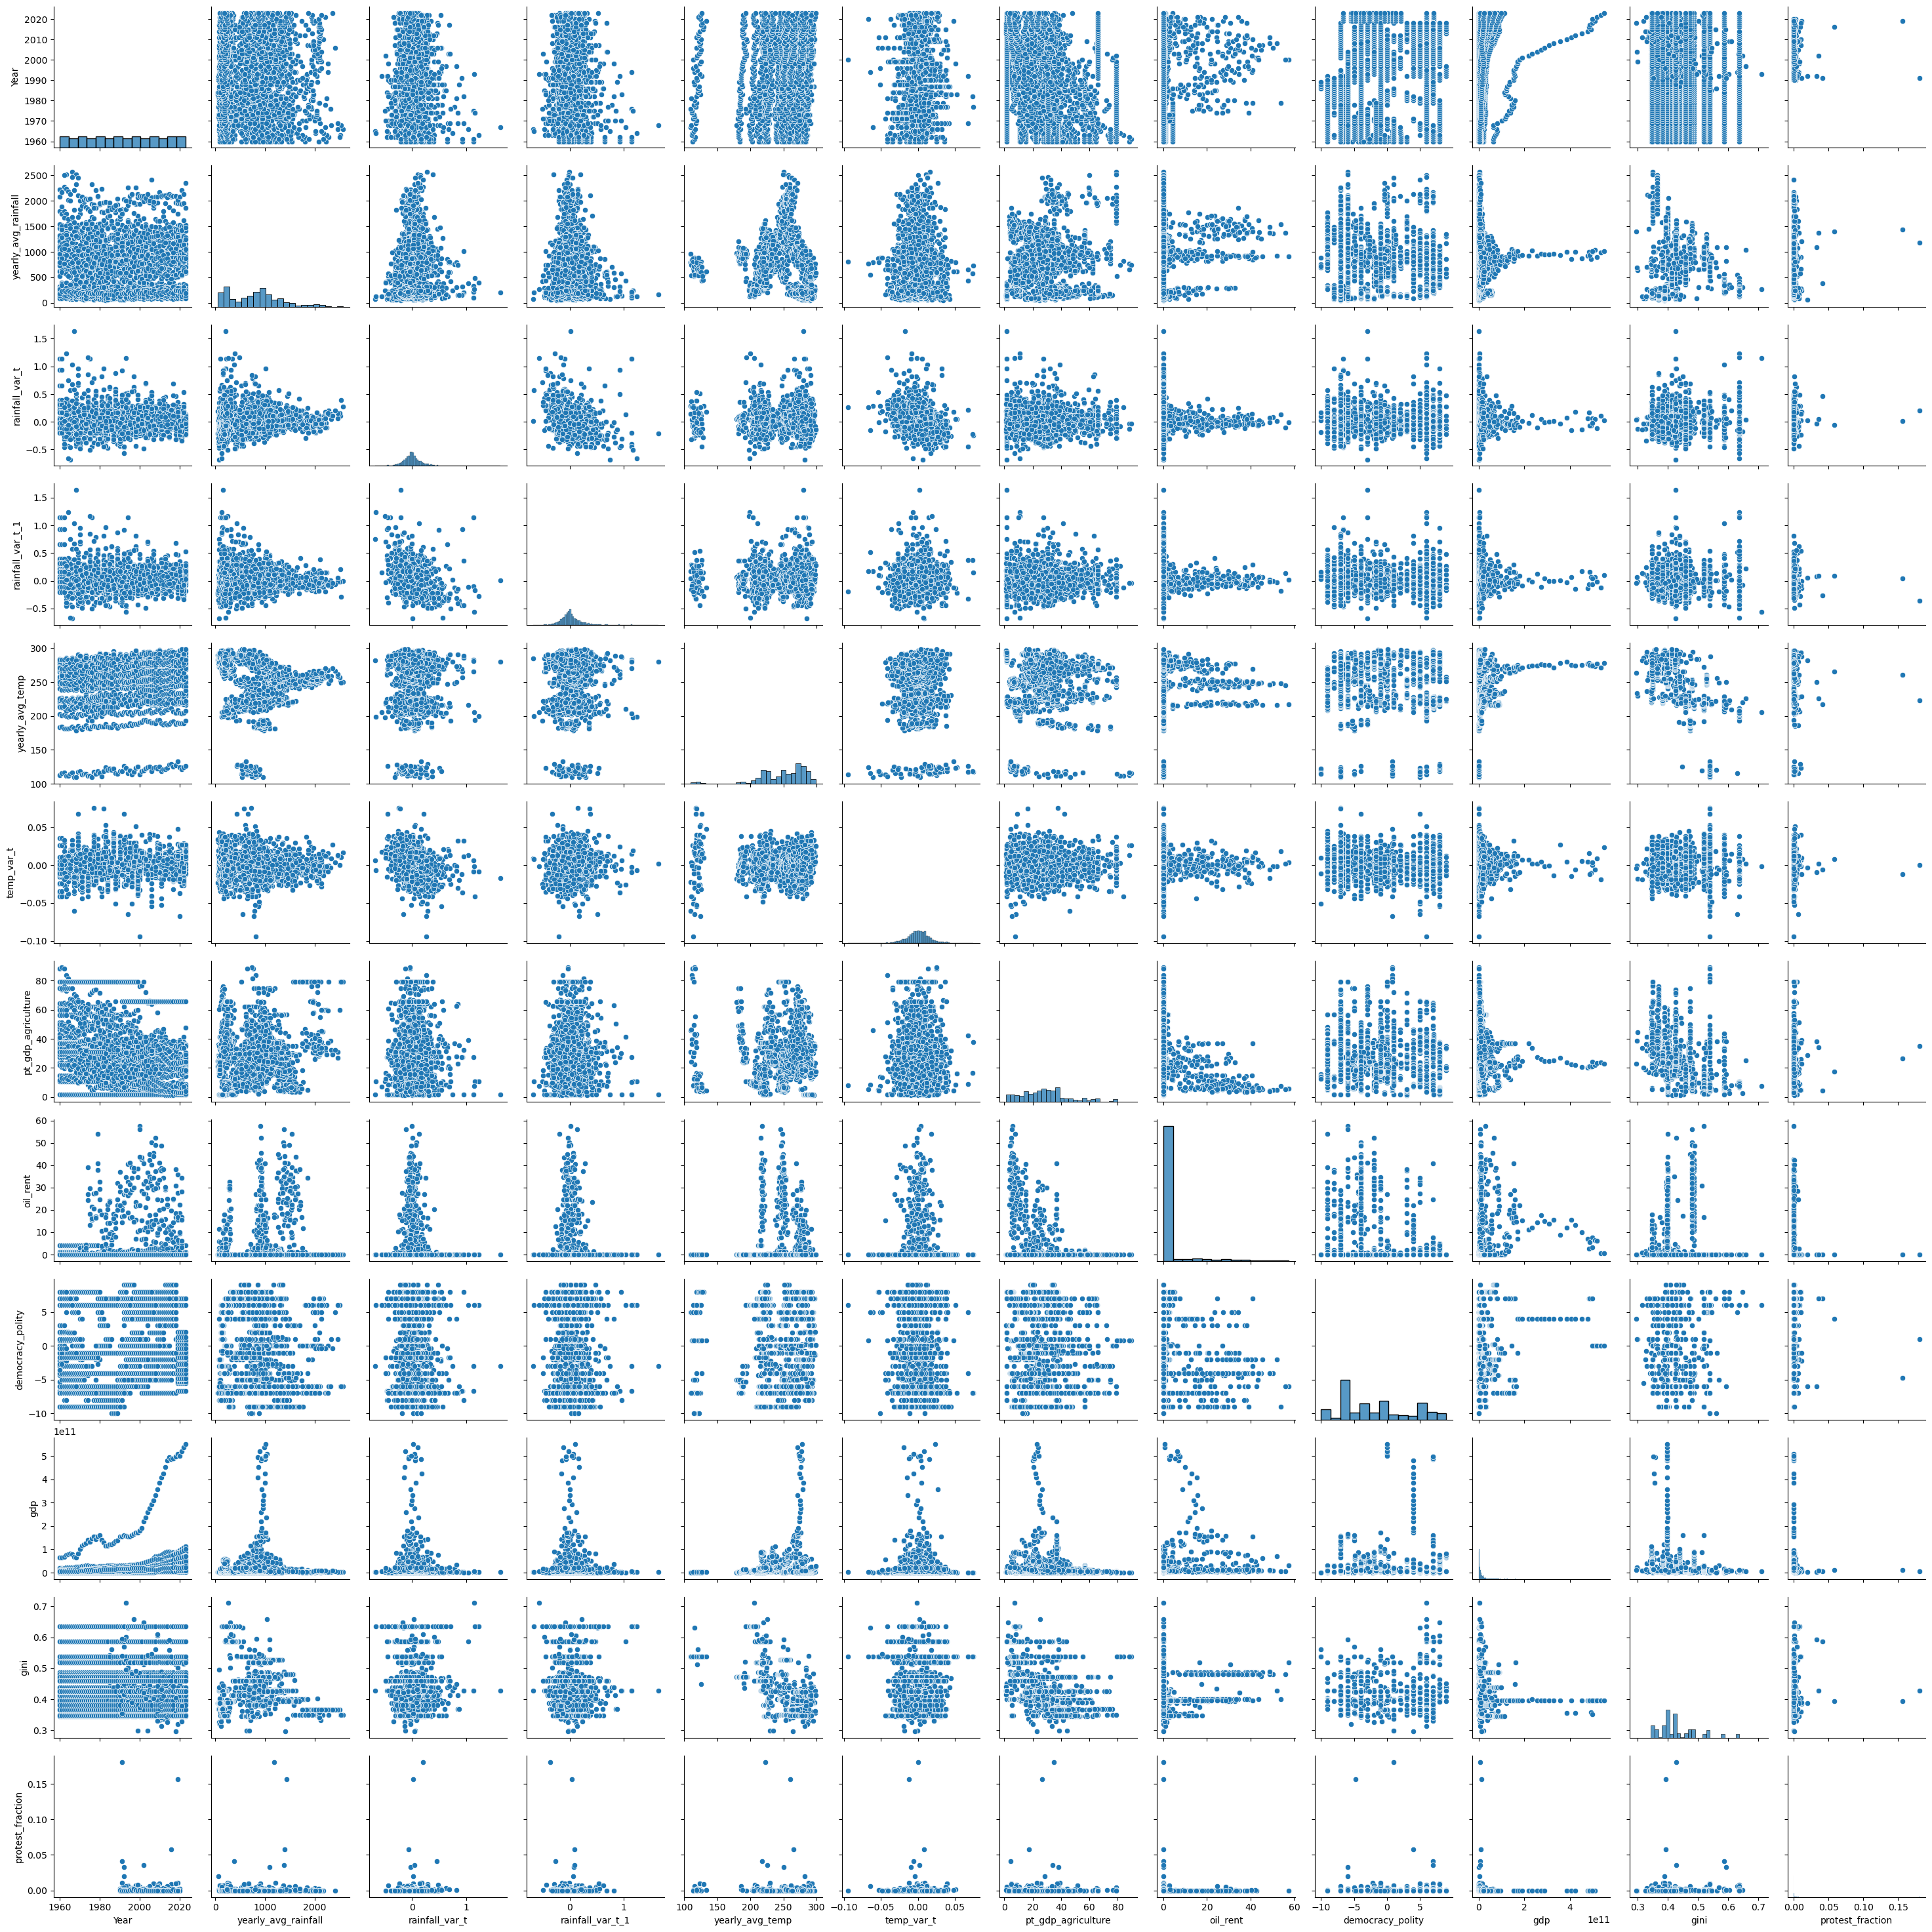

In [58]:
sns.pairplot(sub_data[feats])

## Very simple linear regression for sub-saharan African countries

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import root_mean_squared_error, r2_score

Just do Uganda for test

In [109]:
uga = sub_data[sub_data['ISO3_code']=='UGA']
uga = uga.dropna()
feats = ['rainfall_var_t', 'rainfall_var_t_1', 'Year',]


train_data, test_data = train_test_split(uga, test_size=0.2)

reg = LinearRegression()
reg.fit(train_data[feats], train_data['gdp_pchange'])

print(reg.score(test_data[feats], test_data['gdp_pchange']))

y_pred =  reg.predict(test_data[feats])
print('rmse:', root_mean_squared_error(test_data['gdp_pchange'], y_pred), 'r2:', r2_score(test_data['gdp_pchange'], y_pred))

0.45258336080148576
rmse: 1.7207187748241293 r2: 0.45258336080148576


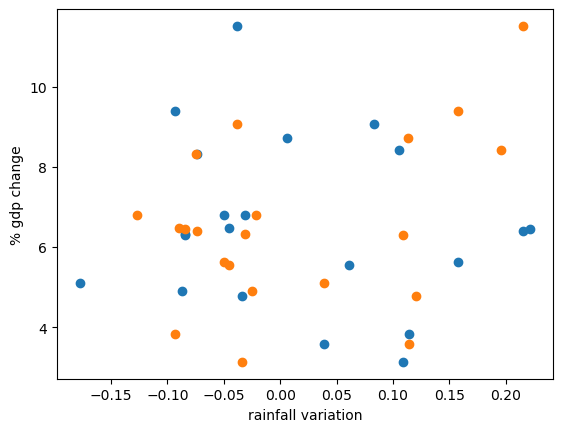

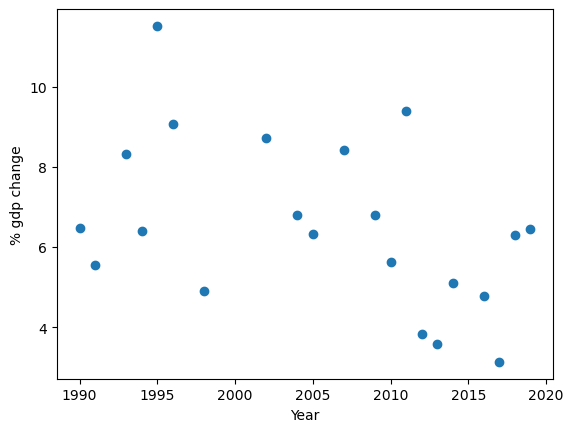

In [61]:
plt.scatter(uga.rainfall_var_t, uga.gdp_pchange, label='t')
plt.scatter(uga.rainfall_var_t_1, uga.gdp_pchange, label='t-1')
plt.xlabel('rainfall variation')
plt.ylabel('% gdp change')
plt.show()
plt.scatter(uga.Year, uga.gdp_pchange)
plt.xlabel('Year')
plt.ylabel('% gdp change')
plt.show()

In Miguel et al., they use the following linear model:

$$
\mathrm{growth}_{it}=a_{i}+X_{it}b+c_{0}\Delta R_{it} + c_{1}\Delta R_{i,t-1} + d_{i}\mathrm{year}_t + e_{it},
$$
where $i$ indexes the country, $t$ indexes the year, $X_{it}$ denote the country-specific variables and $e_{it}$ is a disturbance term allowed to be correlated across years for the same country.

For now let's consider the following simpler version (which they also fit):

$$
\mathrm{growth}_{it} = a_{i} +  c_0 \Delta R_{it} + c_1 \Delta R_{i,t-1} + d_i\mathrm{year}_t.
$$

This equation fits multiple country data together, but allows for different $a_{i}$ and $d_{i}$ parameters for each country. We can construct the same fit by defining categorical variables for each one of the $n$ countries, $\delta_i$, and introducing interaction terms with the year variable:

$$
\mathrm{growth}_{it} = \beta_0  + c_0 \Delta R_{it} + c_1 \Delta R_{i,t-1} + \beta_1 \delta_{1} + \cdots + \beta_n \delta_n + \beta_{n+1} \mathrm{year} \delta_1 + \cdots + \beta_{2n} \mathrm{year} \delta_n
$$
such that when $i=1$, we get

$$
\mathrm{growth}_{1t} = \beta_0 + c_0 \Delta R_{it} + c_1 \Delta R_{i,t-1} + \beta_1  + \beta_{n+1} \mathrm{year}. 
$$

In [62]:
pd.get_dummies(sub_data['ISO3_code'])*1

AGO  BEN  BWA  CAF  CIV  COD  COG  DJI  ERI  ETH  ...  SDN  SEN  SLE  \
192     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
193     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
194     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
195     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
196     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9140    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9141    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9142    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9143    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
9144    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      SOM  TCD  TGO  TZA  UGA  ZMB  ZWE  
192     0    0    0    0    0    0    0  
193     0    0    0    0    0    0    0  
194     0    0    0    0    0    0    0  
195     0    0    0    0    0    0    0  
196     0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
9140    0    0    0    0    0    0    1  
9141    0    0    0    0    0    0    1  
9142    0    0    0    0    0    0    1  
9143    0    0    0    0    0    0    1  
9144    0    0    0    0    0    0    1  

[2242 rows x 35 columns]

In [63]:
sub_data.dropna(inplace=True)
cols = []
for code in sub_data['ISO3_code'].unique():
    sub_data[code] = pd.get_dummies(sub_data['ISO3_code'])[code]*1
    sub_data[f'{code}_year'] = sub_data[code] * sub_data['Year']
    cols.append(code)
    cols.append(f'{code}_year')
sub_data.columns

/tmp/ipykernel_603699/1041852720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.dropna(inplace=True)
/tmp/ipykernel_603699/1041852720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[code] = pd.get_dummies(sub_data['ISO3_code'])[code]*1
/tmp/ipykernel_603699/1041852720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction', 'AGO',
       'AGO_year', 'BEN', 'BEN_year', 'BWA', 'BWA_year', 'CAF', 'CAF_year',
       'TCD', 'TCD_year', 'DJI', 'DJI_year', 'ETH', 'ETH_year', 'GAB',
       'GAB_year', 'GHA', 'GHA_year', 'GIN', 'GIN_year', 'KEN', 'KEN_year',
       'LSO', 'LSO_year', 'LBR', 'LBR_year', 'MDG', 'MDG_year', 'MWI',
       'MWI_year', 'MLI', 'MLI_year', 'MRT', 'MRT_year', 'NAM', 'NAM_year',
       'NER', 'NER_year', 'NGA', 'NGA_year', 'RWA', 'RWA_year', 'SEN',
       'SEN_year', 'SLE', 'SLE_year', 'SDN', 'SDN_year', 'TZA', 'TZA_year',
       'TGO', 'TGO_year', 'UGA', 'UGA_ye

In [143]:
interaction_lr = LinearRegression()
train_data, test_data = train_test_split(sub_data, test_size=0.2, stratify=sub_data['ISO3_code'])
interaction_lr.fit(train_data[feats + cols], train_data['gdp_pchange'])
interaction_lr.score(test_data[feats + cols], test_data['gdp_pchange'])

-0.43632052540418975

In [145]:
interaction_lr = LinearRegression()
interaction_lr.fit(sub_data[feats + cols], sub_data['gdp_pchange'])
print(interaction_lr.score(sub_data[feats + cols], sub_data['gdp_pchange']))
print(root_mean_squared_error(sub_data['gdp_pchange'], interaction_lr.predict(sub_data[feats+cols])))

0.1725184673778023
5.584007845219937


In [65]:
print(len(feats + cols), len(train_data), len(test_data))

61 436 109


In [66]:
y_pred =  interaction_lr.predict(test_data[feats+cols])
print('rmse:', root_mean_squared_error(test_data['gdp_pchange'], y_pred), 'r2:', r2_score(test_data['gdp_pchange'], y_pred))

rmse: 7.566352857917352 r2: -0.07704021442284037


In the paper, they report a root mean square error of $0.07$ and $R^2=0.02$ for this fit. 

### Try random forest regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor


In [112]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,21),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv.fit(train_data[feats+cols], train_data['gdp_pchange'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 21), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [113]:
grid_cv.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [114]:
grid_cv.best_score_

np.float64(-2.1634322843848453)

In [115]:
feature_importance_df = pd.DataFrame({
    'Feature': feats+cols,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

             Feature  Importance
0           UGA_year        0.42
1               Year        0.40
2   rainfall_var_t_1        0.13
3     rainfall_var_t        0.05
4                AGO        0.00
..               ...         ...
56               UGA        0.00
57               ZMB        0.00
58          ZMB_year        0.00
59               ZWE        0.00
60          ZWE_year        0.00

[61 rows x 2 columns]


Try without columns:

In [116]:
grid_cv = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,21),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv.fit(train_data[feats], train_data['gdp_pchange'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 21), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [117]:
grid_cv.best_params_

{'max_depth': 1, 'n_estimators': 500}

In [118]:
grid_cv.best_score_

np.float64(-2.166898726582051)

In [119]:
## code here
feature_importance_df = pd.DataFrame({
    'Feature': feats,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

            Feature  Importance
0              Year       0.834
1  rainfall_var_t_1       0.128
2    rainfall_var_t       0.038


### Try Syria

In [122]:
syr = data[data['ISO3_code']=='SYR']
feats = ['rainfall_var_t', 'rainfall_var_t_1', 'Year',]


train_data, test_data = train_test_split(syr, test_size=0.2)

reg = LinearRegression()
reg.fit(train_data[feats], train_data['gdp_pchange'])

print(reg.score(test_data[feats], test_data['gdp_pchange']))

y_pred =  reg.predict(test_data[feats])
print('rmse:', root_mean_squared_error(test_data['gdp_pchange'], y_pred), 'r2:', r2_score(test_data['gdp_pchange'], y_pred))

ValueError: Input y contains NaN.

In [123]:
syr['gdp_pchange']

7991          NaN
7992    10.833059
7993    24.521294
7994    -8.652747
7995     9.271366
          ...    
8050     1.220704
8051    -0.697154
8052     1.854215
8053     0.732780
8054   -84.894152
Name: gdp_pchange, Length: 64, dtype: float64